In [2]:
import gensim

In [3]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

model = LdaModel(common_corpus, 5, common_dictionary)
cm = CoherenceModel(model=model, corpus=common_corpus, coherence='u_mass')
coherence = cm.get_coherence()

In [3]:
model

In [4]:
cm

In [5]:
coherence

-14.679371186797123

In [23]:
dict(common_dictionary)

{0: 'computer',
 1: 'human',
 2: 'interface',
 3: 'response',
 4: 'survey',
 5: 'system',
 6: 'time',
 7: 'user',
 8: 'eps',
 9: 'trees',
 10: 'graph',
 11: 'minors'}

In [24]:
common_corpus

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]

<h1> Gensim Core Concepts

In [25]:
import pprint

In [26]:
document = "Human machine interface for lab abc computer applications"

In [27]:
text_corpus = [    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [28]:
stoplist = set('for a of the and to in'.split(' '))

In [29]:
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in text_corpus]
texts

[['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications'],
 ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'management', 'system'],
 ['system', 'human', 'system', 'engineering', 'testing', 'eps'],
 ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement'],
 ['generation', 'random', 'binary', 'unordered', 'trees'],
 ['intersection', 'graph', 'paths', 'trees'],
 ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'],
 ['graph', 'minors', 'survey']]

In [30]:
# Count Word Frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1
frequency

defaultdict(int,
            {'human': 2,
             'machine': 1,
             'interface': 2,
             'lab': 1,
             'abc': 1,
             'computer': 2,
             'applications': 1,
             'survey': 2,
             'user': 3,
             'opinion': 1,
             'system': 4,
             'response': 2,
             'time': 2,
             'eps': 2,
             'management': 1,
             'engineering': 1,
             'testing': 1,
             'relation': 1,
             'perceived': 1,
             'error': 1,
             'measurement': 1,
             'generation': 1,
             'random': 1,
             'binary': 1,
             'unordered': 1,
             'trees': 3,
             'intersection': 1,
             'graph': 3,
             'paths': 1,
             'minors': 2,
             'iv': 1,
             'widths': 1,
             'well': 1,
             'quasi': 1,
             'ordering': 1})

In [31]:
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
processed_corpus

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [32]:
from gensim import corpora
# Associate each word with a unique integer ID
dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...)


In [33]:
dictionary.token2id

{'computer': 0,
 'human': 1,
 'interface': 2,
 'response': 3,
 'survey': 4,
 'system': 5,
 'time': 6,
 'user': 7,
 'eps': 8,
 'trees': 9,
 'graph': 10,
 'minors': 11}

In [35]:
new_doc  = "Human Computer Interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
new_vec

[(0, 1), (1, 1)]

In [36]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
bow_corpus

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]

In [42]:
from gensim import models

tfidf = models.TfidfModel(bow_corpus)
words = 'system minors'.lower().split()
tfidf[dictionary.doc2bow(words)]

[(5, 0.5898341626740045), (11, 0.8075244024440723)]

In [55]:
from gensim import similarities
# Index the entire corpus
index = similarities.SparseMatrixSimilarity(tfidf[bow_corpus], num_features=len(dictionary))
# list(index)

In [56]:
query_doc = 'system engineering'.split()
query_bow = dictionary.doc2bow(query_doc)
sims = index[tfidf[query_bow]]
list(enumerate(sims))

[(0, 0.0),
 (1, 0.32448703),
 (2, 0.41707572),
 (3, 0.7184812),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0)]

In [58]:
# Our document is most similar to document 3 by tfidf similarity score
sorted(enumerate(sims), key=lambda x: x[1], reverse=True)

[(3, 0.7184812),
 (2, 0.41707572),
 (1, 0.32448703),
 (0, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0)]

<h1> Corpora and Vector Spaces

In [59]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [60]:
documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [75]:
from pprint import pprint  # pretty-printer
from collections import defaultdict

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

Had to skip some stuff since links were broken to mycorpus.txt

In [77]:
import gensim
import numpy as np
numpy_matrix = np.random.randint(10, size=[5, 2])  # random matrix as an example
corpus = gensim.matutils.Dense2Corpus(numpy_matrix)
corpus.dense

array([[9, 1, 7, 7, 8],
       [8, 1, 4, 3, 5]])

In [88]:
# This cell might also be broken
import scipy
scipy_sparse_matrix = scipy.sparse.random(10, 2)  # random sparse matrix as example
print(scipy_sparse_matrix)
corpus = gensim.matutils.Sparse2Corpus(scipy_sparse_matrix)
print(corpus)
scipy_csc_matrix = gensim.matutils.corpus2csc(corpus)
scipy_csc_matrix

<0x2 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Column format>

<h1> Topic and Transformations

In [90]:
from collections import defaultdict
from gensim import corpora

documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

2020-04-01 19:43:09,994 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-04-01 19:43:09,995 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)


In [107]:
pprint(corpus)
pprint(dict(dictionary))

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]
{0: 'computer',
 1: 'human',
 2: 'interface',
 3: 'response',
 4: 'survey',
 5: 'system',
 6: 'time',
 7: 'user',
 8: 'eps',
 9: 'trees',
 10: 'graph',
 11: 'minors'}


In [108]:
tfidf = models.TfidfModel(corpus)

2020-04-01 19:45:54,576 : INFO : collecting document frequencies
2020-04-01 19:45:54,577 : INFO : PROGRESS: processing document #0
2020-04-01 19:45:54,578 : INFO : calculating IDF weights for 9 documents and 12 features (28 matrix non-zeros)


In [118]:
doc_bow = [(0, 1), (1, 1)]
print(tfidf[doc_bow])

[(0, 0.7071067811865476), (1, 0.7071067811865476)]


In [136]:
corpus_tfidf = tfidf[corpus]
corpora.MmCorpus.serialize('corpus.mm', corpus_tfidf)

2020-04-01 19:52:55,397 : INFO : storing corpus in Matrix Market format to corpus.mm
2020-04-01 19:52:55,398 : INFO : saving sparse matrix to corpus.mm
2020-04-01 19:52:55,399 : INFO : PROGRESS: saving document #0
2020-04-01 19:52:55,400 : INFO : saved 9x12 matrix, density=25.926% (28/108)
2020-04-01 19:52:55,401 : INFO : saving MmCorpus index to corpus.mm.index


In [140]:
corpus_loaded = corpora.MmCorpus('corpus.mm')
list(corpus_loaded)

2020-04-01 19:54:03,811 : INFO : loaded corpus index from corpus.mm.index
2020-04-01 19:54:03,811 : INFO : initializing cython corpus reader from corpus.mm
2020-04-01 19:54:03,812 : INFO : accepted corpus with 9 documents, 12 features, 28 non-zero entries


[[(0, 0.5773502691896257), (1, 0.5773502691896257), (2, 0.5773502691896257)],
 [(0, 0.44424552527467476),
  (3, 0.44424552527467476),
  (4, 0.44424552527467476),
  (5, 0.3244870206138555),
  (6, 0.44424552527467476),
  (7, 0.3244870206138555)],
 [(2, 0.5710059809418182),
  (5, 0.4170757362022777),
  (7, 0.4170757362022777),
  (8, 0.5710059809418182)],
 [(1, 0.49182558987264147), (5, 0.7184811607083769), (8, 0.49182558987264147)],
 [(3, 0.6282580468670046), (6, 0.6282580468670046), (7, 0.45889394536615247)],
 [(9, 1.0)],
 [(9, 0.7071067811865475), (10, 0.7071067811865475)],
 [(9, 0.5080429008916749), (10, 0.5080429008916749), (11, 0.695546419520037)],
 [(4, 0.6282580468670046),
  (10, 0.45889394536615247),
  (11, 0.6282580468670046)]]

In [142]:
list(corpus_tfidf)

[[(0, 0.5773502691896257), (1, 0.5773502691896257), (2, 0.5773502691896257)],
 [(0, 0.44424552527467476),
  (3, 0.44424552527467476),
  (4, 0.44424552527467476),
  (5, 0.3244870206138555),
  (6, 0.44424552527467476),
  (7, 0.3244870206138555)],
 [(2, 0.5710059809418182),
  (5, 0.4170757362022777),
  (7, 0.4170757362022777),
  (8, 0.5710059809418182)],
 [(1, 0.49182558987264147), (5, 0.7184811607083769), (8, 0.49182558987264147)],
 [(3, 0.6282580468670046), (6, 0.6282580468670046), (7, 0.45889394536615247)],
 [(9, 1.0)],
 [(9, 0.7071067811865475), (10, 0.7071067811865475)],
 [(9, 0.5080429008916749), (10, 0.5080429008916749), (11, 0.695546419520037)],
 [(4, 0.6282580468670046),
  (10, 0.45889394536615247),
  (11, 0.6282580468670046)]]

In [143]:
# Transform TfIdf corpus into latent 2-D space using LSI
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)

2020-04-01 19:56:17,358 : INFO : using serial LSI version on this node
2020-04-01 19:56:17,359 : INFO : updating model with new documents
2020-04-01 19:56:17,360 : INFO : preparing a new chunk of documents
2020-04-01 19:56:17,360 : INFO : using 100 extra samples and 2 power iterations
2020-04-01 19:56:17,361 : INFO : 1st phase: constructing (12, 102) action matrix
2020-04-01 19:56:17,363 : INFO : orthonormalizing (12, 102) action matrix
2020-04-01 19:56:17,449 : INFO : 2nd phase: running dense svd on (12, 9) matrix
2020-04-01 19:56:17,454 : INFO : computing the final decomposition
2020-04-01 19:56:17,455 : INFO : keeping 2 factors (discarding 47.565% of energy spectrum)
2020-04-01 19:56:17,460 : INFO : processed documents up to #9
2020-04-01 19:56:17,461 : INFO : topic #0(1.594): 0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"response" + 0.060*"time" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"
2020-04-01 19:56:17,462 : INFO : topic #

In [146]:
lsi_model.print_topics(2)

2020-04-01 19:58:05,562 : INFO : topic #0(1.594): 0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"response" + 0.060*"time" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"
2020-04-01 19:58:05,563 : INFO : topic #1(1.476): -0.460*"system" + -0.373*"user" + -0.332*"eps" + -0.328*"interface" + -0.320*"response" + -0.320*"time" + -0.293*"computer" + -0.280*"human" + -0.171*"survey" + 0.161*"trees"


[(0,
  '0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"response" + 0.060*"time" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"'),
 (1,
  '-0.460*"system" + -0.373*"user" + -0.332*"eps" + -0.328*"interface" + -0.320*"response" + -0.320*"time" + -0.293*"computer" + -0.280*"human" + -0.171*"survey" + 0.161*"trees"')]

In [149]:
corpus_lsi = lsi_model[corpus_tfidf]
list(corpus_lsi)

[[(0, 0.06600783396090135), (1, -0.5200703306361859)],
 [(0, 0.1966759285914224), (1, -0.7609563167700061)],
 [(0, 0.08992639972446098), (1, -0.7241860626752515)],
 [(0, 0.0758584765217788), (1, -0.6320551586003432)],
 [(0, 0.10150299184979951), (1, -0.5737308483002963)],
 [(0, 0.7032108939378316), (1, 0.1611518021402547)],
 [(0, 0.8774787673119839), (1, 0.16758906864659018)],
 [(0, 0.9098624686818586), (1, 0.14086553628718618)],
 [(0, 0.6165825350569285), (1, -0.05392907566389632)]]

In [152]:
for doc, as_text in zip(corpus_lsi, documents):
    print(doc, as_text)

[(0, 0.06600783396090135), (1, -0.5200703306361859)] Human machine interface for lab abc computer applications
[(0, 0.1966759285914224), (1, -0.7609563167700061)] A survey of user opinion of computer system response time
[(0, 0.08992639972446098), (1, -0.7241860626752515)] The EPS user interface management system
[(0, 0.0758584765217788), (1, -0.6320551586003432)] System and human system engineering testing of EPS
[(0, 0.10150299184979951), (1, -0.5737308483002963)] Relation of user perceived response time to error measurement
[(0, 0.7032108939378316), (1, 0.1611518021402547)] The generation of random binary unordered trees
[(0, 0.8774787673119839), (1, 0.16758906864659018)] The intersection graph of paths in trees
[(0, 0.9098624686818586), (1, 0.14086553628718618)] Graph minors IV Widths of trees and well quasi ordering
[(0, 0.6165825350569285), (1, -0.05392907566389632)] Graph minors A survey


Skipped available transformation. That comes later in more depth

<h1> Similarity Queries

In [159]:
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)

2020-04-01 20:07:49,812 : INFO : using serial LSI version on this node
2020-04-01 20:07:49,813 : INFO : updating model with new documents
2020-04-01 20:07:49,813 : INFO : preparing a new chunk of documents
2020-04-01 20:07:49,814 : INFO : using 100 extra samples and 2 power iterations
2020-04-01 20:07:49,815 : INFO : 1st phase: constructing (12, 102) action matrix
2020-04-01 20:07:49,815 : INFO : orthonormalizing (12, 102) action matrix
2020-04-01 20:07:49,817 : INFO : 2nd phase: running dense svd on (12, 9) matrix
2020-04-01 20:07:49,818 : INFO : computing the final decomposition
2020-04-01 20:07:49,818 : INFO : keeping 2 factors (discarding 43.156% of energy spectrum)
2020-04-01 20:07:49,819 : INFO : processed documents up to #9
2020-04-01 20:07:49,820 : INFO : topic #0(3.341): 0.644*"system" + 0.404*"user" + 0.301*"eps" + 0.265*"time" + 0.265*"response" + 0.240*"computer" + 0.221*"human" + 0.206*"survey" + 0.198*"interface" + 0.036*"graph"
2020-04-01 20:07:49,821 : INFO : topic #1(2

In [160]:
doc = "Human computer interaction"
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print(vec_lsi)

[(0, 0.461821004532716), (1, 0.0700276652789995)]


In [161]:
index = similarities.MatrixSimilarity(lsi[corpus]) # using cosine similarity

2020-04-01 20:08:57,613 : WARNING : scanning corpus to determine the number of features (consider setting `num_features` explicitly)
2020-04-01 20:08:57,623 : INFO : creating matrix with 9 documents and 2 features


In [165]:
sims = index[vec_lsi]
sims

array([ 0.998093  ,  0.93748635,  0.9984453 ,  0.9865886 ,  0.90755945,
       -0.12416792, -0.10639259, -0.09879464,  0.05004176], dtype=float32)

In [166]:
sorted(enumerate(sims), key=lambda item: -item[1])

[(2, 0.9984453),
 (0, 0.998093),
 (3, 0.9865886),
 (1, 0.93748635),
 (4, 0.90755945),
 (8, 0.050041765),
 (7, -0.09879464),
 (6, -0.10639259),
 (5, -0.12416792)]

<h1> Word2Vec

In [4]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [21]:
for i, word in enumerate(wv.vocab):
    if i == 10:
        break
    print(word)

</s>
in
for
that
is
on
##
The
with
said


300

In [6]:
vec_king = wv['king']
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [7]:
try:
    vec_cameroon = wv['cameroon']
except KeyError:
    print("The word 'cameroon' does not appear in this model")

The word 'cameroon' does not appear in this model


In [8]:
pairs = [    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [9]:
print(wv.most_similar(positive=['car', 'minivan'], topn=5))

[('SUV', 0.8532191514968872), ('vehicle', 0.8175784349441528), ('pickup_truck', 0.7763689160346985), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.7565719485282898)]


In [10]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


C:\Users\Khachatur\Miniconda3\envs\tensorflow\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [13]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus(object):
    """An interator that yields sentences (lists of str)."""

    def __iter__(self):
        corpus_path = datapath('lee_background.cor')
        for line in open(corpus_path):
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(line)

In [33]:
import gensim.models

sentences = MyCorpus()
model = gensim.models.Word2Vec(sentences=sentences)

In [27]:
import numpy as np
vec_king = model.wv['king']

100

In [17]:
for i, word in enumerate(model.wv.vocab):
    if i == 10:
        break
    print(word)

hundreds
of
people
have
been
forced
to
their
homes
in


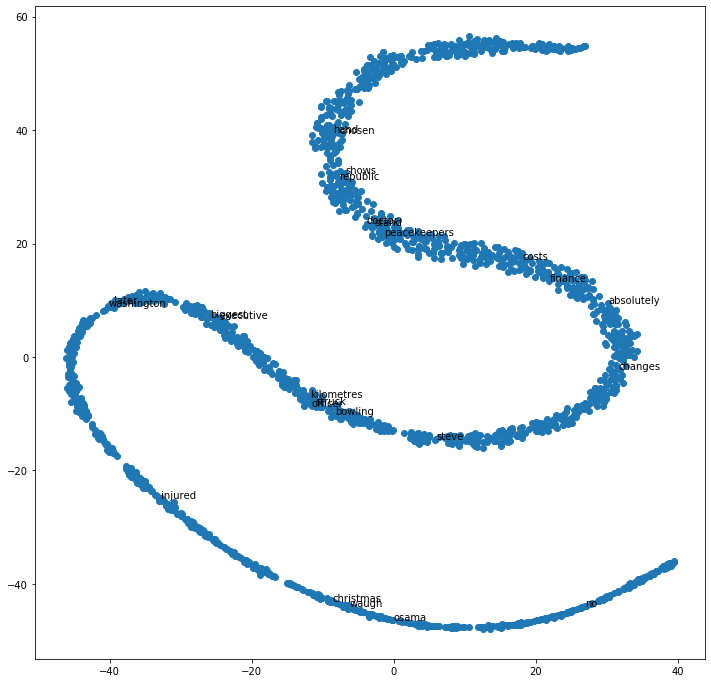

In [35]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

plot_with_matplotlib(x_vals, y_vals, labels)
